## Telecom Churn Case Study

### Objective:
To build a predictive model that will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.



In [1021]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn

In [1022]:
# importing warnings

import warnings
warnings.filterwarnings('ignore')

### Importing and reading the dataset

In [1023]:
# Reading the dataset

telecom_data = pd.read_csv('telecom_churn_data.csv')
pd.set_option('display.max_columns', None)
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Data Inspection

In [1024]:
# Reading the shape of dataset

telecom_data.shape          # telecom data has 99999 records and 226 columns

(99999, 226)

In [1025]:
# Summary of the dataset

telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [1026]:
# Reading the statistical summary of dataset

telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Data Preparation

#### Filtering high-value customers in the dataset

High-value customers: Customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [1027]:
# As instructed in the module, we need to filter out the high values customers in the dataset

# Creating average column for total recharge of 'total_rech_amt_6' & 'total_rech_amt_7'

telecom_data['avg_rech_good_ph'] = (telecom_data['total_rech_amt_6']  + telecom_data['total_rech_amt_7'])/2

In [1028]:
# Finding 70 percentile cutoff from the average total recharge for two months (good phase)

cutoff_70per = np.quantile(telecom_data['avg_rech_good_ph'],.70)
cutoff_70per

368.5

In [1029]:
# Creating column to filter out high value customers

telecom_data['high_val_cust'] = telecom_data['avg_rech_good_ph'].apply(lambda x : 1 if x >= cutoff_70per else 0)

# Viewing the columns to cross check: total_rech_amt_6, total_rech_amt_7, total_rech_amt_9, high_val_cust

telecom_data[['total_rech_amt_6', 'total_rech_amt_7', 'high_val_cust']].head()

,total_rech_amt_6,total_rech_amt_7,high_val_cust
0,362,252,0
1,74,384,0
2,168,315,0
3,230,310,0
4,196,350,0


In [1030]:
# Filtering out the high value customers

telecom_data = telecom_data[ telecom_data['high_val_cust'] == 1 ]

In [1031]:
# Resetting the index

telecom_data.reset_index(drop = True, inplace = True)

In [1032]:
# Checking the shape of the dataset

telecom_data.shape     # Currently, the dataset has 29010 records and 228 columns

(30011, 228)

#### Tagging churners and removing attributes of the churn phase
Tagging the churned customers (churn=1, else 0) based on the fourth month. Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase.

In [1033]:
# creating a function for tagging the churn (target variable)

def tag_Churn(a,b,c,d):
    if a == 0 and b == 0 and c == 0 and d == 0:
        return 1
    else:
        return 0

In [1034]:
# Tagging the churn customers

telecom_data['churn'] = telecom_data.apply(lambda x : tag_Churn(x['total_ic_mou_9'],
                    x['total_og_mou_9'],x['vol_2g_mb_9'],x['vol_3g_mb_9']) , axis = 1)

In [1035]:
# Value counts of churn variable

telecom_data.churn.value_counts()     # 2,593 customer has been churned and 27,418 have not as per the filter criteria provided

0    27418
1     2593
Name: churn, dtype: int64

In [1036]:
# Dropping the attributes of 9th month

cols = telecom_data.columns.tolist()           # Getting the columns in the list

# Loopoing over the columns to find the attributes with "_9"
attr_9 = []
for i in cols:
    if i[-2:] == "_9":
        attr_9.append(i)
        
# Checking the list: attr_9

attr_9[:10]

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9']

In [1037]:
# Dropping the columns with attributes "_9" and 'avg_rech_good_ph' & 'high_val_cust'

telecom_data = telecom_data.drop(attr_9, axis = 1 )
telecom_data = telecom_data.drop(['avg_rech_good_ph','high_val_cust'], axis = 1)

In [1038]:
# Shape of dataframe after removing attributes of 9th month

telecom_data.shape

(30011, 173)

In [1039]:
# Checking the data imbalance in dataset

telecom_data.churn.value_counts(normalize=True)*100

# we could see that churn class has around 8.6% records, which proves that distribution of examples within a dataset is skewed or biased.

0    91.359835
1     8.640165
Name: churn, dtype: float64

#### Handling Missing Values

In [1040]:
missing_value_cols = (telecom_data.isna().sum() * 100 ) / telecom_data.shape[0]
missing_value_cols [ missing_value_cols >= 30 ]

# the following columns has more than 30% of missing values and hence, needs to be dropped.

date_of_last_rech_data_6    62.023925
date_of_last_rech_data_7    61.140915
date_of_last_rech_data_8    60.834361
total_rech_data_6           62.023925
total_rech_data_7           61.140915
total_rech_data_8           60.834361
max_rech_data_6             62.023925
max_rech_data_7             61.140915
max_rech_data_8             60.834361
count_rech_2g_6             62.023925
count_rech_2g_7             61.140915
count_rech_2g_8             60.834361
count_rech_3g_6             62.023925
count_rech_3g_7             61.140915
count_rech_3g_8             60.834361
av_rech_amt_data_6          62.023925
av_rech_amt_data_7          61.140915
av_rech_amt_data_8          60.834361
arpu_3g_6                   62.023925
arpu_3g_7                   61.140915
arpu_3g_8                   60.834361
arpu_2g_6                   62.023925
arpu_2g_7                   61.140915
arpu_2g_8                   60.834361
night_pck_user_6            62.023925
night_pck_user_7            61.140915
night_pck_us

In [1041]:
# Dropping the columns with more than 30% missing values

drop_cols = missing_value_cols [ missing_value_cols >= 30 ].index

telecom_data = telecom_data.drop(drop_cols, axis = 1)

In [1042]:
# Dropping insignificant columns with only one unique value and dates columns

cols_drop = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6',
            'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
            'std_ic_t2o_mou_8', 'date_of_last_rech_6', 'date_of_last_rech_7',
            'date_of_last_rech_8', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

telecom_data = telecom_data.drop(cols_drop, axis = 1)
telecom_data.shape

(30011, 127)

In [1043]:
# Checking the percentages of columns missing values

missing_value_cols = (telecom_data.isna().sum() * 100 ) / telecom_data.shape[0]
missing_value_cols[ missing_value_cols > 0 ]

onnet_mou_6         1.052947
onnet_mou_7         1.009630
onnet_mou_8         3.125521
offnet_mou_6        1.052947
offnet_mou_7        1.009630
offnet_mou_8        3.125521
roam_ic_mou_6       1.052947
roam_ic_mou_7       1.009630
roam_ic_mou_8       3.125521
roam_og_mou_6       1.052947
roam_og_mou_7       1.009630
roam_og_mou_8       3.125521
loc_og_t2t_mou_6    1.052947
loc_og_t2t_mou_7    1.009630
loc_og_t2t_mou_8    3.125521
loc_og_t2m_mou_6    1.052947
loc_og_t2m_mou_7    1.009630
loc_og_t2m_mou_8    3.125521
loc_og_t2f_mou_6    1.052947
loc_og_t2f_mou_7    1.009630
loc_og_t2f_mou_8    3.125521
loc_og_t2c_mou_6    1.052947
loc_og_t2c_mou_7    1.009630
loc_og_t2c_mou_8    3.125521
loc_og_mou_6        1.052947
loc_og_mou_7        1.009630
loc_og_mou_8        3.125521
std_og_t2t_mou_6    1.052947
std_og_t2t_mou_7    1.009630
std_og_t2t_mou_8    3.125521
std_og_t2m_mou_6    1.052947
std_og_t2m_mou_7    1.009630
std_og_t2m_mou_8    3.125521
std_og_t2f_mou_6    1.052947
std_og_t2f_mou

In [1044]:
# Checking the statistical summary for the columns with missing values to determine the imputation

telecom_data[missing_value_cols[ missing_value_cols > 0 ].index].describe()

#We could see that all the numerical columns below has min value of 0 and max value in thousands. Hence, imputing the missing values with median would be correct approach

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
count,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000
mean,299.184718,307.447285,276.234168,422.380819,428.248096,387.121245,17.598062,13.660030,13.683965,29.633675,22.260754,22.161948,95.688242,96.706103,89.951446,183.208674,183.120362,172.998297,7.053601,7.169655,6.703844,1.583837,1.881222,1.767998,285.959416,287.005181,269.662288,191.772393,201.916113,177.752086,205.259036,215.588560,185.362328,2.032163,2.054989,1.847471,399.067969,419.564032,364.965911,2.288522,2.229914,2.094787,5.979323,7.501222,7.107334,0.699876,0.048085,0.061039,69.480649,71.028476,68.064333,161.312344,162.453208,158.585128,15.761590,16.678413,15.180997,246.564535,250.170194,241.840347,16.402055,17.066026,15.537177,32.355853,33.818592,31.416700,2.905095,3.023474,2.767422,51.667018,53.912174,49.725160,0.067441,0.018250,0.028552,11.275252,12.486255,12.078346,1.201454,1.491952,1.277691
std,462.202367,483.244786,471.505518,471.096294,487.103204,480.279273,79.552216,76.679599,75.706579,119.160857,98.397962,107.874014,237.903645,249.205463,237.947663,250.755724,241.245958,236.653042,22.774304,22.692338,20.509418,6.923971,9.300807,7.509452,380.873082,376.646673,369.341135,411.420669,429.818676,415.409296,415.149605,439.636272,422.152597,12.521796,13.416765,11.883145,608.350635,639.300752,622.748058,46.161171,45.850893,45.510330,18.710136,23.170819,23.225842,2.292307,2.755729,3.373442,159.329635,168.015550,157.735902,222.564453,219.943309,218.709960,46.041807,49.701815,44.332505,313.446109,316.075062,309.013919,79.263002,85.104942,73.541062,101.567155,106.290523,106.850027,20.032011,20.613417,20.588122,141.150203,149.840403,142.951184,0.195181,0.182861,0.118332,67.605417,77.373771,76.097831,14.060690,15.484128,13.094224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [1045]:
# Using SimpleImputer package from sklearn for median imputation

from sklearn.impute import SimpleImputer      # Import SimpleImputer package from sklearn

missing_cols_index = missing_value_cols[ missing_value_cols > 0 ].index
median_imputation = SimpleImputer(missing_values=np.nan, strategy='median')

for i in missing_cols_index:
    telecom_data[i] = median_imputation.fit_transform(telecom_data[[i]]).ravel()

In [1046]:
# Cross checking the missing values

telecom_data.isna().sum()[ telecom_data.isna().sum() > 0 ]

# No variable has missing values

Series([], dtype: int64)

#### Handling Outliers

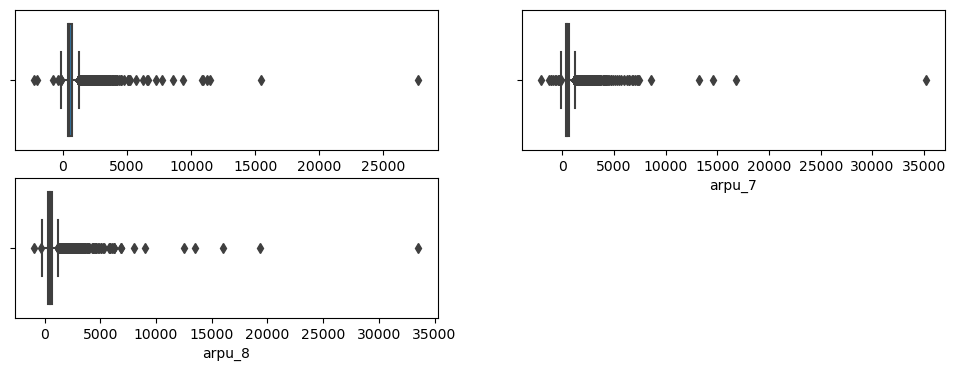

In [1047]:
# plotting a box plot for arpu(Average revenue per user)

plt.figure(figsize = [12,4])
plt.subplot(2,2,1)
sns.boxplot(x=telecom_data['arpu_6'])
plt.subplot(2,2,2)
sns.boxplot(x=telecom_data['arpu_7'])
plt.subplot(2,2,3)
sns.boxplot(x=telecom_data['arpu_8'])
plt.show()

# Though the presence of outliers could be seen, we could understand that there would be customers who would recharge in high amount and use multiple services provided

In [1048]:
# Checking the statistical summary of the arpu, total_rech_amt, max_rech_amt

telecom_data[['arpu_6','arpu_7','arpu_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8']].describe()

,arpu_6,arpu_7,arpu_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,697.365833,695.962880,613.638799,171.414048,175.661058,162.869348
std,442.722413,462.897814,492.259586,539.325984,562.143146,601.821630,174.703215,181.545389,172.605809
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,364.161000,365.004500,289.609500,432.000000,426.500000,309.000000,110.000000,110.000000,67.000000
50%,495.682000,493.561000,452.091000,584.000000,581.000000,520.000000,120.000000,128.000000,130.000000
75%,703.922000,700.788000,671.150000,837.000000,835.000000,790.000000,200.000000,200.000000,198.000000
max,27731.088000,35145.834000,33543.624000,35190.000000,40335.000000,45320.000000,4010.000000,4010.000000,4449.000000


### Exploratory Data Analysis

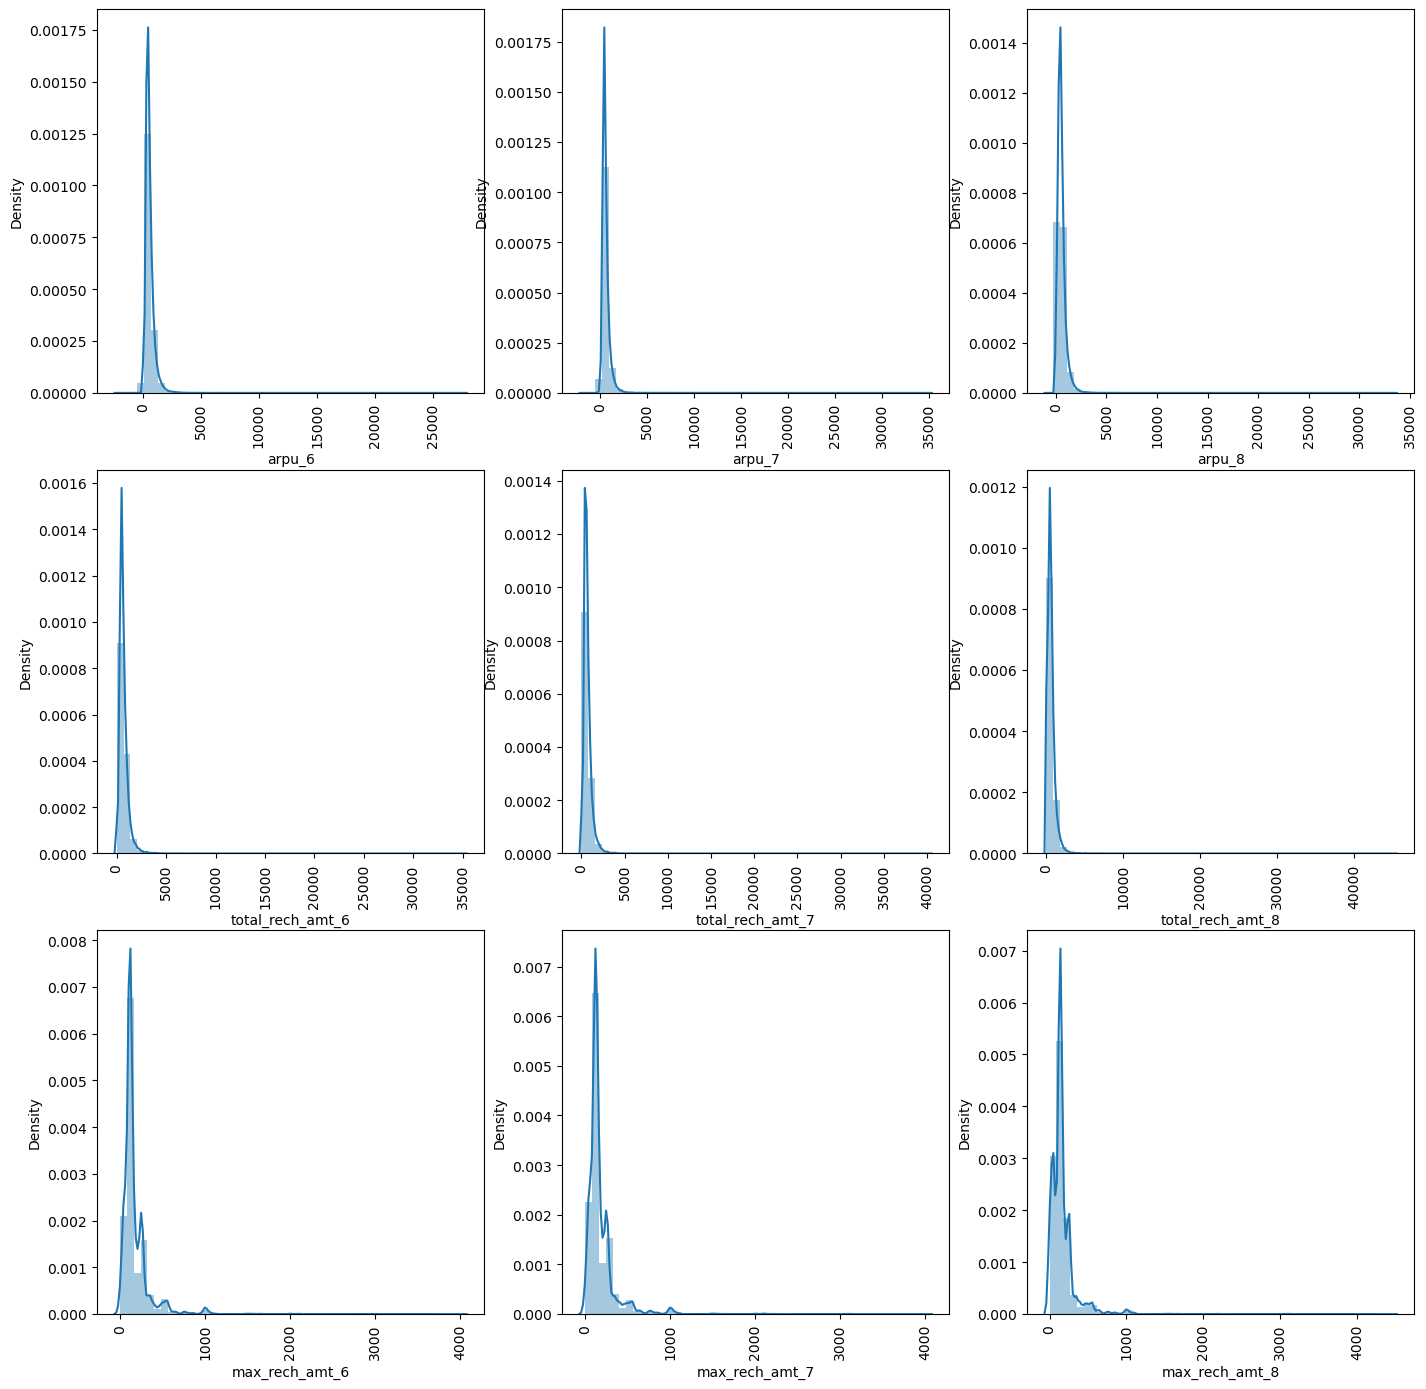

In [1049]:
#Checking the distribution of the columns: 'arpu_6','arpu_7','arpu_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'

num_fields = ['arpu_6','arpu_7','arpu_8','total_rech_amt_6','total_rech_amt_7',
              'total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8']

plt.figure(figsize=(17,15))
plt.subplots_adjust(bottom=.01)
for i in enumerate(num_fields):    
    plt.subplot(3, 3, i[0]+1)
    sns.distplot(telecom_data[i[1]])    
    plt.xticks(rotation=90)
plt.show()

- None of the variables are in normal distribution
- Average revenue per user for all 3 months has more values between 0 to 3000.
- Further, distribution of all three variables for three months looks almost similar which proves that customers follows same pattern of recharges and services utilization which generates more or less same amount of revenue.

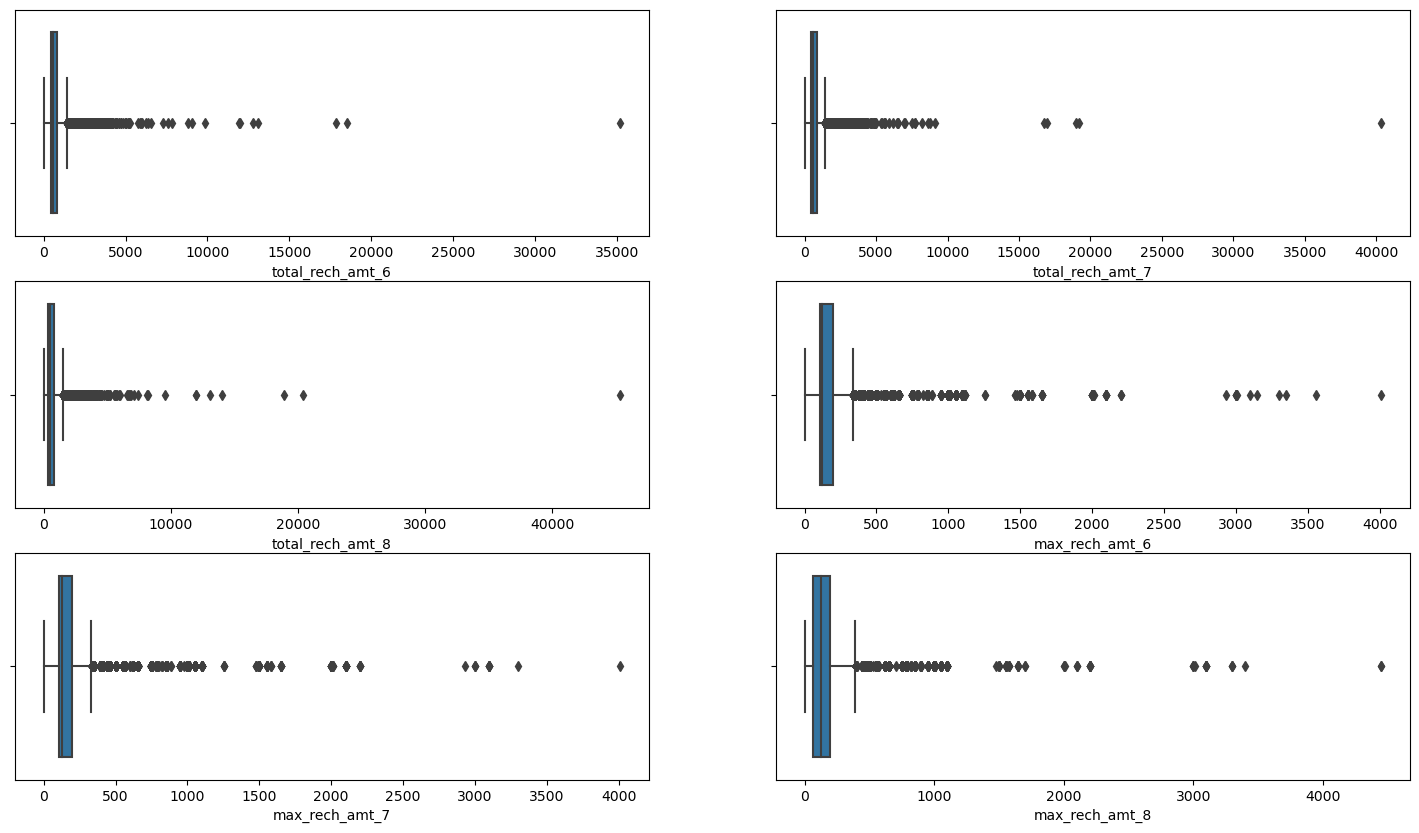

In [1050]:
# Boxplots for 'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'

plt.figure(figsize = [18,10])
plt.subplot(3,2,1)
sns.boxplot(x=telecom_data['total_rech_amt_6'])
plt.subplot(3,2,2)
sns.boxplot(x=telecom_data['total_rech_amt_7'])
plt.subplot(3,2,3)
sns.boxplot(x=telecom_data['total_rech_amt_8'])
plt.subplot(3,2,4)
sns.boxplot(x=telecom_data['max_rech_amt_6'])
plt.subplot(3,2,5)
sns.boxplot(x=telecom_data['max_rech_amt_7'])
plt.subplot(3,2,6)
sns.boxplot(x=telecom_data['max_rech_amt_8'])
plt.show()

#### Correlation of the variables

<Axes: >

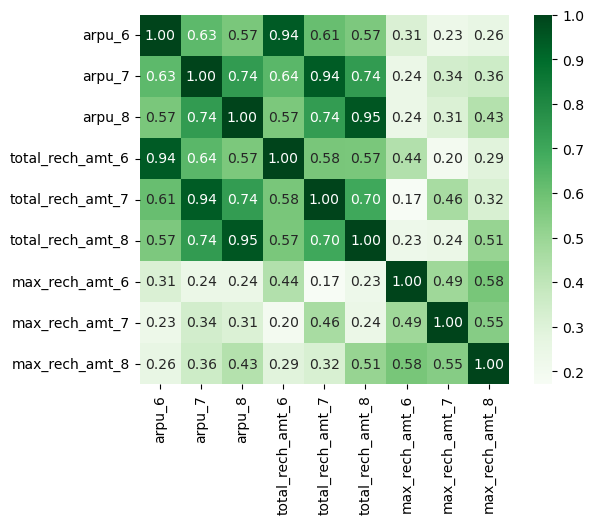

In [1051]:
corr_df = telecom_data[['arpu_6','arpu_7','arpu_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8']].corr()

sns.heatmap(corr_df, annot = True, cmap = "Greens",cbar=True, square= True, fmt='.2f')

We could see high correlation between arpu(Average revenue per user) and total_rech_amt

### Train Test Split for feature selection

In [1052]:
# importing necessary library

from sklearn.model_selection import train_test_split

# Putting feature variable to X

X = telecom_data.drop(['churn','mobile_number'], axis = 1)

#Checking the head of X dataframe

X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0
2,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0
3,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89

In [1053]:
# Putting target variable to y
y = telecom_data['churn']

y.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [1054]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify = y, random_state=100)

print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(21007, 125) (9004, 125) (21007,) (9004,)


In [1055]:
#To check the distribution of target variable in train set

y_train.value_counts(normalize=True)

0    0.9136
1    0.0864
Name: churn, dtype: float64

In [1056]:
#To check the distribution of target variable in test set

y_test.value_counts(normalize=True)

0    0.913594
1    0.086406
Name: churn, dtype: float64

#### Feature Selection

In [1057]:
# Random forest classifier for feature importance

from sklearn.ensemble import RandomForestClassifier   # Importing the RandomForestClassifier package

rf = RandomForestClassifier(n_estimators = 25).fit(X_train, y_train)

feats = X_train.columns
    
feat_imp_df = pd.DataFrame({'Feature':feats,'Imp_Value':rf.feature_importances_})
feat_imp_df = feat_imp_df.sort_values(by = ['Imp_Value'], ascending=False)
feat_imp_df.head()

,Feature,Imp_Value
80,total_ic_mou_8,0.077015
2,arpu_8,0.051506
95,total_rech_amt_8,0.045655
53,total_og_mou_8,0.045483
98,max_rech_amt_8,0.028118


In [1058]:
# Extracting the top 25 columns based on the feature importance value

cols_model =   ['mobile_number','total_og_mou_8', 'total_ic_mou_8', 'arpu_8', 'loc_ic_mou_8',
       'last_day_rch_amt_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'offnet_mou_8', 'loc_ic_t2m_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'total_rech_num_8', 'total_og_mou_7', 'arpu_7',
       'loc_og_t2m_mou_8', 'total_ic_mou_7', 'onnet_mou_8',
       'total_rech_amt_7', 'aon', 'arpu_6', 'std_og_t2m_mou_8',
       'std_ic_mou_8', 'total_rech_amt_6', 'loc_og_mou_6', 'loc_ic_mou_7','churn']

In [1059]:
# Dropping the other columns in telecom_data

telecom_data = telecom_data[cols_model]

#Setting mobile_number as index

telecom_data = telecom_data.set_index('mobile_number')

#Checking the head of dataframe

telecom_data.head()

,total_og_mou_8,total_ic_mou_8,arpu_8,loc_ic_mou_8,last_day_rch_amt_8,total_rech_amt_8,max_rech_amt_8,offnet_mou_8,loc_ic_t2m_mou_8,roam_ic_mou_8,roam_og_mou_8,total_rech_num_8,total_og_mou_7,arpu_7,loc_og_t2m_mou_8,total_ic_mou_7,onnet_mou_8,total_rech_amt_7,aon,arpu_6,std_og_t2m_mou_8,std_ic_mou_8,total_rech_amt_6,loc_og_mou_6,loc_ic_mou_7,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,350.16,428.74,3171.480,188.04,779,3638,1580,325.91,121.19,31.64,38.06,7,609.24,1349.850,162.28,558.04,52.29,790,802,1069.180,49.14,193.94,1580,422.16,355.23,1
7001524846,171.56,16.54,137.362,15.79,10,120,30,136.48,15.48,0.00,0.00,14,431.66,492.223,50.54,28.49,35.08,601,315,378.721,75.69,0.75,437,378.09,23.83,0
7002191713,1015.26,1144.53,593.260,255.26,0,717,130,482.46,195.18,72.11,1.44,11,192.41,205.671,294.46,172.58,534.24,253,2607,492.846,156.94,474.41,507,205.31,26.11,0
7000875565,233.38,294.46,187.894,211.78,130,160,130,162.76,150.16,0.00,0.00,2,286.01,299.869,128.28,381.56,70.61,348,511,430.975,18.29,82.44,570,315.91,229.83,0
7000187447,0.00,0.00,25.499,0.00,0,30,30,5.54,0.00,4.81,13.34,4,0.81,18.980,0.00,2.31,7.79,0,667,690.008,0.00,0.00,816,97.54,2.31,0


### Handling Class Imbalance

In [1060]:
print(telecom_data.churn.value_counts())
telecom_data.churn.value_counts(normalize = True).reset_index()

0    27418
1     2593
Name: churn, dtype: int64


,index,churn
0,0,0.913598
1,1,0.086402


Text(0.5, 1.0, 'Class Distributions')

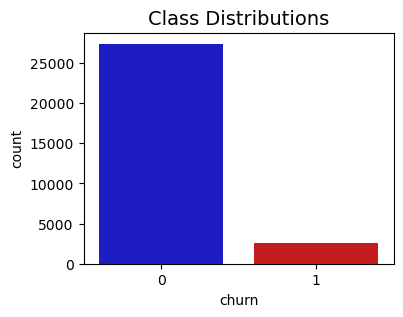

In [1061]:
#Visualizing the class imbalance with bar chart

colors = ["#0101DF", "#DF0101"]
plt.figure(figsize=[4,3])
sns.countplot(x=telecom_data['churn'], palette=colors)
plt.title('Class Distributions', fontsize=14)

#### Train Test split for resampling

We have the following resampling techniques:
1. Random Under-Sampling
2. Random Over-Sampling
3. SMOTE - Synthetic Minority Oversampling Technique
4. ADASYN - Adaptive Synthetic Sampling Method
5. SMOTETomek - Over-sampling followed by under-sampling

In [1062]:
#Creating train and test split for applying resampling techniques on train dataset

y = telecom_data['churn']
X = telecom_data.drop(['churn'], axis = 1)

#Assigning X_train, y_train, X_test, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

In [1063]:
# Checking the class distribution on training data

print(y_train.value_counts())
y_train.value_counts(normalize = True).reset_index()

0    19192
1     1815
Name: churn, dtype: int64


,index,churn
0,0,0.9136
1,1,0.0864


In [1064]:
# Checking the class distribution on test data

print(y_test.value_counts())
y_test.value_counts(normalize = True).reset_index()

0    8226
1     778
Name: churn, dtype: int64


,index,churn
0,0,0.913594
1,1,0.086406


##### Logistic Regression - Resampling 

In [1065]:
# Building a basic logistic regression model for applying resampling

# Importing necessary libraries
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# Creating a logistic regression model

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [1066]:
#Predictions based the model created: logreg

y_pred = logreg.predict(X_test)

In [1067]:
#Checking the evaluation metrics and reading classification report

print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9326965792980897
F1 score:  0.49246231155778897
Recall:  0.37789203084832906
Precision:  0.7067307692307693

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      8226
           1       0.71      0.38      0.49       778

    accuracy                           0.93      9004
   macro avg       0.83      0.68      0.73      9004
weighted avg       0.92      0.93      0.92      9004


 confussion matrix:
 [[8104  122]
 [ 484  294]]


##### Random Undersampling

In [1068]:
# Applying random undersampling in training data

from imblearn.under_sampling import RandomUnderSampler    #importing necessary library

under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

3630

In [1069]:
# Distribution of churn classes in resampled train set

print(sorted(Counter(y_resampled_us).items()))

[(0, 1815), (1, 1815)]


In [1070]:
#Building logistic regression for X_resampled_us and y_resampled_us

logreg_us = LogisticRegression()
logreg_us.fit(X_resampled_us, y_resampled_us)

y_pred_us = logreg_us.predict(X_test)

In [1071]:
#Checking the evaluation metrics and reading classification report

print ('Accuracy: ', accuracy_score(y_test, y_pred_us))
print ('F1 score: ', f1_score(y_test, y_pred_us))
print ('Recall: ', recall_score(y_test, y_pred_us))
print ('Precision: ', precision_score(y_test, y_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us))

Accuracy:  0.8471790315415371
F1 score:  0.47720364741641336
Recall:  0.8071979434447301
Precision:  0.33872707659115425

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      8226
           1       0.34      0.81      0.48       778

    accuracy                           0.85      9004
   macro avg       0.66      0.83      0.69      9004
weighted avg       0.92      0.85      0.87      9004


 confussion matrix:
 [[7000 1226]
 [ 150  628]]


##### Tomek Links

In [1072]:
# Applying tomek links in training set

from imblearn.under_sampling import TomekLinks     # importing necessary libraries

tomek_sample = TomekLinks(sampling_strategy='majority')
X_resampled_tomek, y_resampled_tomek = tomek_sample.fit_resample(X_train, y_train)
len(X_resampled_tomek)

20623

In [1073]:
# Distribution of churn classes in resampled train set

print(sorted(Counter(y_resampled_tomek).items()))

[(0, 18808), (1, 1815)]


In [1074]:
#Building logistic regression for X_resampled_tomek and y_resampled_tomek

logreg_tomek = LogisticRegression()
logreg_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_tomek = logreg_tomek.predict(X_test)

In [1075]:
#Checking the evaluation metrics and reading classification report

print ('Accuracy: ', accuracy_score(y_test, y_pred_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_tomek))
print ('Recall: ', recall_score(y_test, y_pred_tomek))
print ('Precision: ', precision_score(y_test, y_pred_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_tomek))

Accuracy:  0.932252332296757
F1 score:  0.5088566827697262
Recall:  0.40616966580976865
Precision:  0.6810344827586207

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      8226
           1       0.68      0.41      0.51       778

    accuracy                           0.93      9004
   macro avg       0.81      0.69      0.74      9004
weighted avg       0.92      0.93      0.92      9004


 confussion matrix:
 [[8078  148]
 [ 462  316]]


##### Random Over-Sampling

In [1076]:
#Applying Random OverSampling in training set

from imblearn.over_sampling import RandomOverSampler      #Importing necessary library

over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

38384

In [1077]:
# Distribution of churn classes in resampled train set

print(sorted(Counter(y_resampled_os).items()))

[(0, 19192), (1, 19192)]


In [1078]:
#Building logistic regression for X_resampled_os and y_resampled_os

logreg_os = LogisticRegression()
logreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = logreg_os.predict(X_test)

In [1079]:
#Checking the evaluation metrics and reading classification report

print ('Accuracy: ', accuracy_score(y_test, y_pred_os))
print ('F1 score: ', f1_score(y_test, y_pred_os))
print ('Recall: ', recall_score(y_test, y_pred_os))
print ('Precision: ', precision_score(y_test, y_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_os))

Accuracy:  0.8481785872945358
F1 score:  0.47884102173084253
Recall:  0.8071979434447301
Precision:  0.3403794037940379

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      8226
           1       0.34      0.81      0.48       778

    accuracy                           0.85      9004
   macro avg       0.66      0.83      0.69      9004
weighted avg       0.92      0.85      0.87      9004


 confussion matrix:
 [[7009 1217]
 [ 150  628]]


##### SMOTE - Synthetic Minority Oversampling Technique

In [1080]:
# Applying SMOTE in training set

from imblearn.over_sampling import SMOTE      #Importing necessary library
 
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

38384

In [1081]:
# Distribution of churn classes in resampled train set

print(sorted(Counter(y_resampled_smt).items()))

[(0, 19192), (1, 19192)]


In [1082]:
#Building logistic regression for X_resampled_smt and y_resampled_smt

logreg_smt = LogisticRegression()
logreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = logreg_smt.predict(X_test)

In [1083]:
#Checking the evaluation metrics and reading classification report

print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.8506219458018658
F1 score:  0.48089540717869544
Recall:  0.800771208226221
Precision:  0.3436293436293436

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.91      8226
           1       0.34      0.80      0.48       778

    accuracy                           0.85      9004
   macro avg       0.66      0.83      0.70      9004
weighted avg       0.92      0.85      0.88      9004


 confussion matrix:
 [[7036 1190]
 [ 155  623]]


##### ADASYN

In [1084]:
# Applying ADASYN in training data

from imblearn.over_sampling import ADASYN     #Importing necessary library

ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

37861

In [1085]:
# Distribution of churn classes in resampled train set

print(sorted(Counter(y_resampled_ada).items()))

[(0, 19192), (1, 18669)]


In [1086]:
#Building logistic regression for X_resampled_ada and y_resampled_ada

logreg_ada = LogisticRegression()
logreg_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_ada = logreg_ada.predict(X_test)

In [1087]:
#Checking the evaluation metrics and reading classification report

print ('Accuracy: ', accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', f1_score(y_test, y_pred_ada))
print ('Recall: ', recall_score(y_test, y_pred_ada))
print ('Precision: ', precision_score(y_test, y_pred_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_ada))

Accuracy:  0.8211905819635718
F1 score:  0.4436765722183829
Recall:  0.8251928020565553
Precision:  0.30340264650283555

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      8226
           1       0.30      0.83      0.44       778

    accuracy                           0.82      9004
   macro avg       0.64      0.82      0.67      9004
weighted avg       0.92      0.82      0.85      9004


 confussion matrix:
 [[6752 1474]
 [ 136  642]]


##### SMOTE+TOMEK

In [1088]:
# Applying SMOTE+TOMEK in training data

from imblearn.combine import SMOTETomek   #Importing necessary library

smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_resampled_smt_tmk)

38320

In [1089]:
# Distribution of churn classes in resampled train set

print(sorted(Counter(y_resampled_smt_tmk).items()))

[(0, 19160), (1, 19160)]


In [1090]:
#Building logistic regression for X_resampled_smt_tmk and y_resampled_smt_tmk

logreg_smt_tmk = LogisticRegression()
logreg_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_smt_tmk = logreg_smt_tmk.predict(X_test)

In [1091]:
#Checking the evaluation metrics and reading classification report

print ('Accuracy: ', accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt_tmk))

Accuracy:  0.8492892047978676
F1 score:  0.4774740084713131
Recall:  0.7969151670951157
Precision:  0.34084661902144037

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      8226
           1       0.34      0.80      0.48       778

    accuracy                           0.85      9004
   macro avg       0.66      0.83      0.69      9004
weighted avg       0.92      0.85      0.87      9004


 confussion matrix:
 [[7027 1199]
 [ 158  620]]


From the above evaluation metrics of various resampling methods, recall for ADASYN is high and stands at 82.5%

##### Resampling - Random Forest Classifier Models

In [1092]:
# Creating a basic random forest classifier model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [1093]:
#Checking the evaluation metrics and reading classification report

print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9390270990670813
F1 score:  0.5831435079726651
Recall:  0.493573264781491
Precision:  0.712430426716141

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      8226
           1       0.71      0.49      0.58       778

    accuracy                           0.94      9004
   macro avg       0.83      0.74      0.78      9004
weighted avg       0.93      0.94      0.93      9004


 confussion matrix:
 [[8071  155]
 [ 394  384]]


In [1094]:
# Random Forest - Random UnderSampling

rf_us = RandomForestClassifier()
rf_us.fit(X_resampled_us, y_resampled_us)

y_pred_rf_us = rf_us.predict(X_test)

In [1095]:
#Checking the evaluation metrics and reading classification report

print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_us))
print ('F1 score: ', f1_score(y_test, y_pred_rf_us))
print ('Recall: ', recall_score(y_test, y_pred_rf_us))
print ('Precision: ', precision_score(y_test, y_pred_rf_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_us))

Accuracy:  0.8720568636161706
F1 score:  0.5243600330305533
Recall:  0.8161953727506427
Precision:  0.3862530413625304

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93      8226
           1       0.39      0.82      0.52       778

    accuracy                           0.87      9004
   macro avg       0.68      0.85      0.73      9004
weighted avg       0.93      0.87      0.89      9004


 confussion matrix:
 [[7217 1009]
 [ 143  635]]


In [1096]:
# Random Forest - Tomek Links

rf_tomek = RandomForestClassifier()
rf_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_rf_tomek = rf_tomek.predict(X_test)

In [1097]:
#Checking the evaluation metrics and reading classification report

print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_rf_tomek))
print ('Recall: ', recall_score(y_test, y_pred_rf_tomek))
print ('Precision: ', precision_score(y_test, y_pred_rf_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_tomek))

Accuracy:  0.94002665482008
F1 score:  0.6029411764705883
Recall:  0.5269922879177378
Precision:  0.7044673539518901

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      8226
           1       0.70      0.53      0.60       778

    accuracy                           0.94      9004
   macro avg       0.83      0.75      0.79      9004
weighted avg       0.93      0.94      0.94      9004


 confussion matrix:
 [[8054  172]
 [ 368  410]]


In [1098]:
# Random Forest - Random Over-Sampling

rf_os = RandomForestClassifier()
rf_os.fit(X_resampled_os, y_resampled_os)

y_pred_rf_os = rf_os.predict(X_test)

In [1099]:
#Checking the evaluation metrics and reading classification report

print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_os))
print ('F1 score: ', f1_score(y_test, y_pred_rf_os))
print ('Recall: ', recall_score(y_test, y_pred_rf_os))
print ('Precision: ', precision_score(y_test, y_pred_rf_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_os))

Accuracy:  0.9374722345624167
F1 score:  0.599288256227758
Recall:  0.5411311053984575
Precision:  0.671451355661882

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      8226
           1       0.67      0.54      0.60       778

    accuracy                           0.94      9004
   macro avg       0.81      0.76      0.78      9004
weighted avg       0.93      0.94      0.93      9004


 confussion matrix:
 [[8020  206]
 [ 357  421]]


In [1100]:
# Random Forest - SMOTE

rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf_smt = rf_smt.predict(X_test)

In [1101]:
#Checking the evaluation metrics and reading classification report

print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))

Accuracy:  0.9168147490004442
F1 score:  0.5780281690140846
Recall:  0.6593830334190232
Precision:  0.5145436308926781

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      8226
           1       0.51      0.66      0.58       778

    accuracy                           0.92      9004
   macro avg       0.74      0.80      0.77      9004
weighted avg       0.93      0.92      0.92      9004


 confussion matrix:
 [[7742  484]
 [ 265  513]]


In [1102]:
# Random Forest - ADASYN

rf_ada = RandomForestClassifier()
rf_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_rf_ada = rf_ada.predict(X_test)

In [1103]:
#Checking the evaluation metrics and reading classification report

print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_ada))
print ('F1 score: ', f1_score(y_test, y_pred_rf_ada))
print ('Recall: ', recall_score(y_test, y_pred_rf_ada))
print ('Precision: ', precision_score(y_test, y_pred_rf_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_ada))

Accuracy:  0.9143713904931142
F1 score:  0.5737976782752903
Recall:  0.6670951156812339
Precision:  0.5033947623666344

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      8226
           1       0.50      0.67      0.57       778

    accuracy                           0.91      9004
   macro avg       0.74      0.80      0.76      9004
weighted avg       0.93      0.91      0.92      9004


 confussion matrix:
 [[7714  512]
 [ 259  519]]


In [1104]:
# Random Forest - SMOTE+TOMEK

rf_smt_tmk = RandomForestClassifier()
rf_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_rf_smt_tmk = rf_smt_tmk.predict(X_test)

In [1105]:
#Checking the evaluation metrics and reading classification report

print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt_tmk))

Accuracy:  0.9173700577521102
F1 score:  0.5782312925170069
Recall:  0.6555269922879178
Precision:  0.5172413793103449

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      8226
           1       0.52      0.66      0.58       778

    accuracy                           0.92      9004
   macro avg       0.74      0.80      0.77      9004
weighted avg       0.93      0.92      0.92      9004


 confussion matrix:
 [[7750  476]
 [ 268  510]]


Further, comparing the recall values for various sampling techniques built on logistic regression and random forest classifier, recall value for ADASYN for logistic regression stands at 82.5% with X_resampled_ada & y_resampled_ada

### Scaling Features
MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

    x = x - min(x) / max(x) - min(x)

In [1106]:
#Importing necessary library

from sklearn.preprocessing import MinMaxScaler

#Assigning scaler as MinMaxScaler

scaler = MinMaxScaler()

cols_model = ['total_og_mou_8', 'total_ic_mou_8', 'arpu_8', 'loc_ic_mou_8',
       'last_day_rch_amt_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'offnet_mou_8', 'loc_ic_t2m_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'total_rech_num_8', 'total_og_mou_7', 'arpu_7',
       'loc_og_t2m_mou_8', 'total_ic_mou_7', 'onnet_mou_8',
       'total_rech_amt_7', 'aon', 'arpu_6', 'std_og_t2m_mou_8',
       'std_ic_mou_8', 'total_rech_amt_6', 'loc_og_mou_6', 'loc_ic_mou_7']

X_resampled_ada[cols_model] = scaler.fit_transform(X_resampled_ada[cols_model])
X_resampled_ada.head()

,total_og_mou_8,total_ic_mou_8,arpu_8,loc_ic_mou_8,last_day_rch_amt_8,total_rech_amt_8,max_rech_amt_8,offnet_mou_8,loc_ic_t2m_mou_8,roam_ic_mou_8,roam_og_mou_8,total_rech_num_8,total_og_mou_7,arpu_7,loc_og_t2m_mou_8,total_ic_mou_7,onnet_mou_8,total_rech_amt_7,aon,arpu_6,std_og_t2m_mou_8,std_ic_mou_8,total_rech_amt_6,loc_og_mou_6,loc_ic_mou_7
0,0.025941,0.104717,0.075468,0.109038,0.004495,0.021095,0.009890,0.023321,0.063988,0.0,0.0,0.152174,0.073882,0.080513,0.065533,0.085901,0.003447,0.031243,0.240396,0.143223,0.000000,0.000081,0.029081,0.044773,0.096166
1,0.022267,0.046886,0.074020,0.039319,0.011238,0.016390,0.029220,0.015908,0.026146,0.0,0.0,0.036232,0.068566,0.087469,0.036504,0.047998,0.008269,0.043585,0.248128,0.185028,0.002913,0.009204,0.075676,0.050397,0.043934
2,0.022483,0.034480,0.075750,0.035665,0.011238,0.021148,0.011238,0.019364,0.023243,0.0,0.0,0.065217,0.065548,0.074227,0.038036,0.039910,0.004137,0.027078,0.441653,0.142527,0.004838,0.000257,0.029730,0.026941,0.043339
3,0.005212,0.052992,0.064969,0.054697,0.009216,0.002168,0.009216,0.003697,0.020586,0.0,0.0,0.021739,0.016360,0.064490,0.006164,0.054624,0.001989,0.000000,0.714665,0.147658,0.000585,0.000505,0.044054,0.001718,0.060307
4,0.000000,0.003949,0.055681,0.003429,0.000000,0.000000,0.000000,0.000000,0.000547,0.0,0.0,0.007246,0.000126,0.052769,0.000000,0.009316,0.000000,0.002291,0.159459,0.158482,0.000000,0.000663,0.046162,0.005401,0.009857


#### Checking correlation between the features

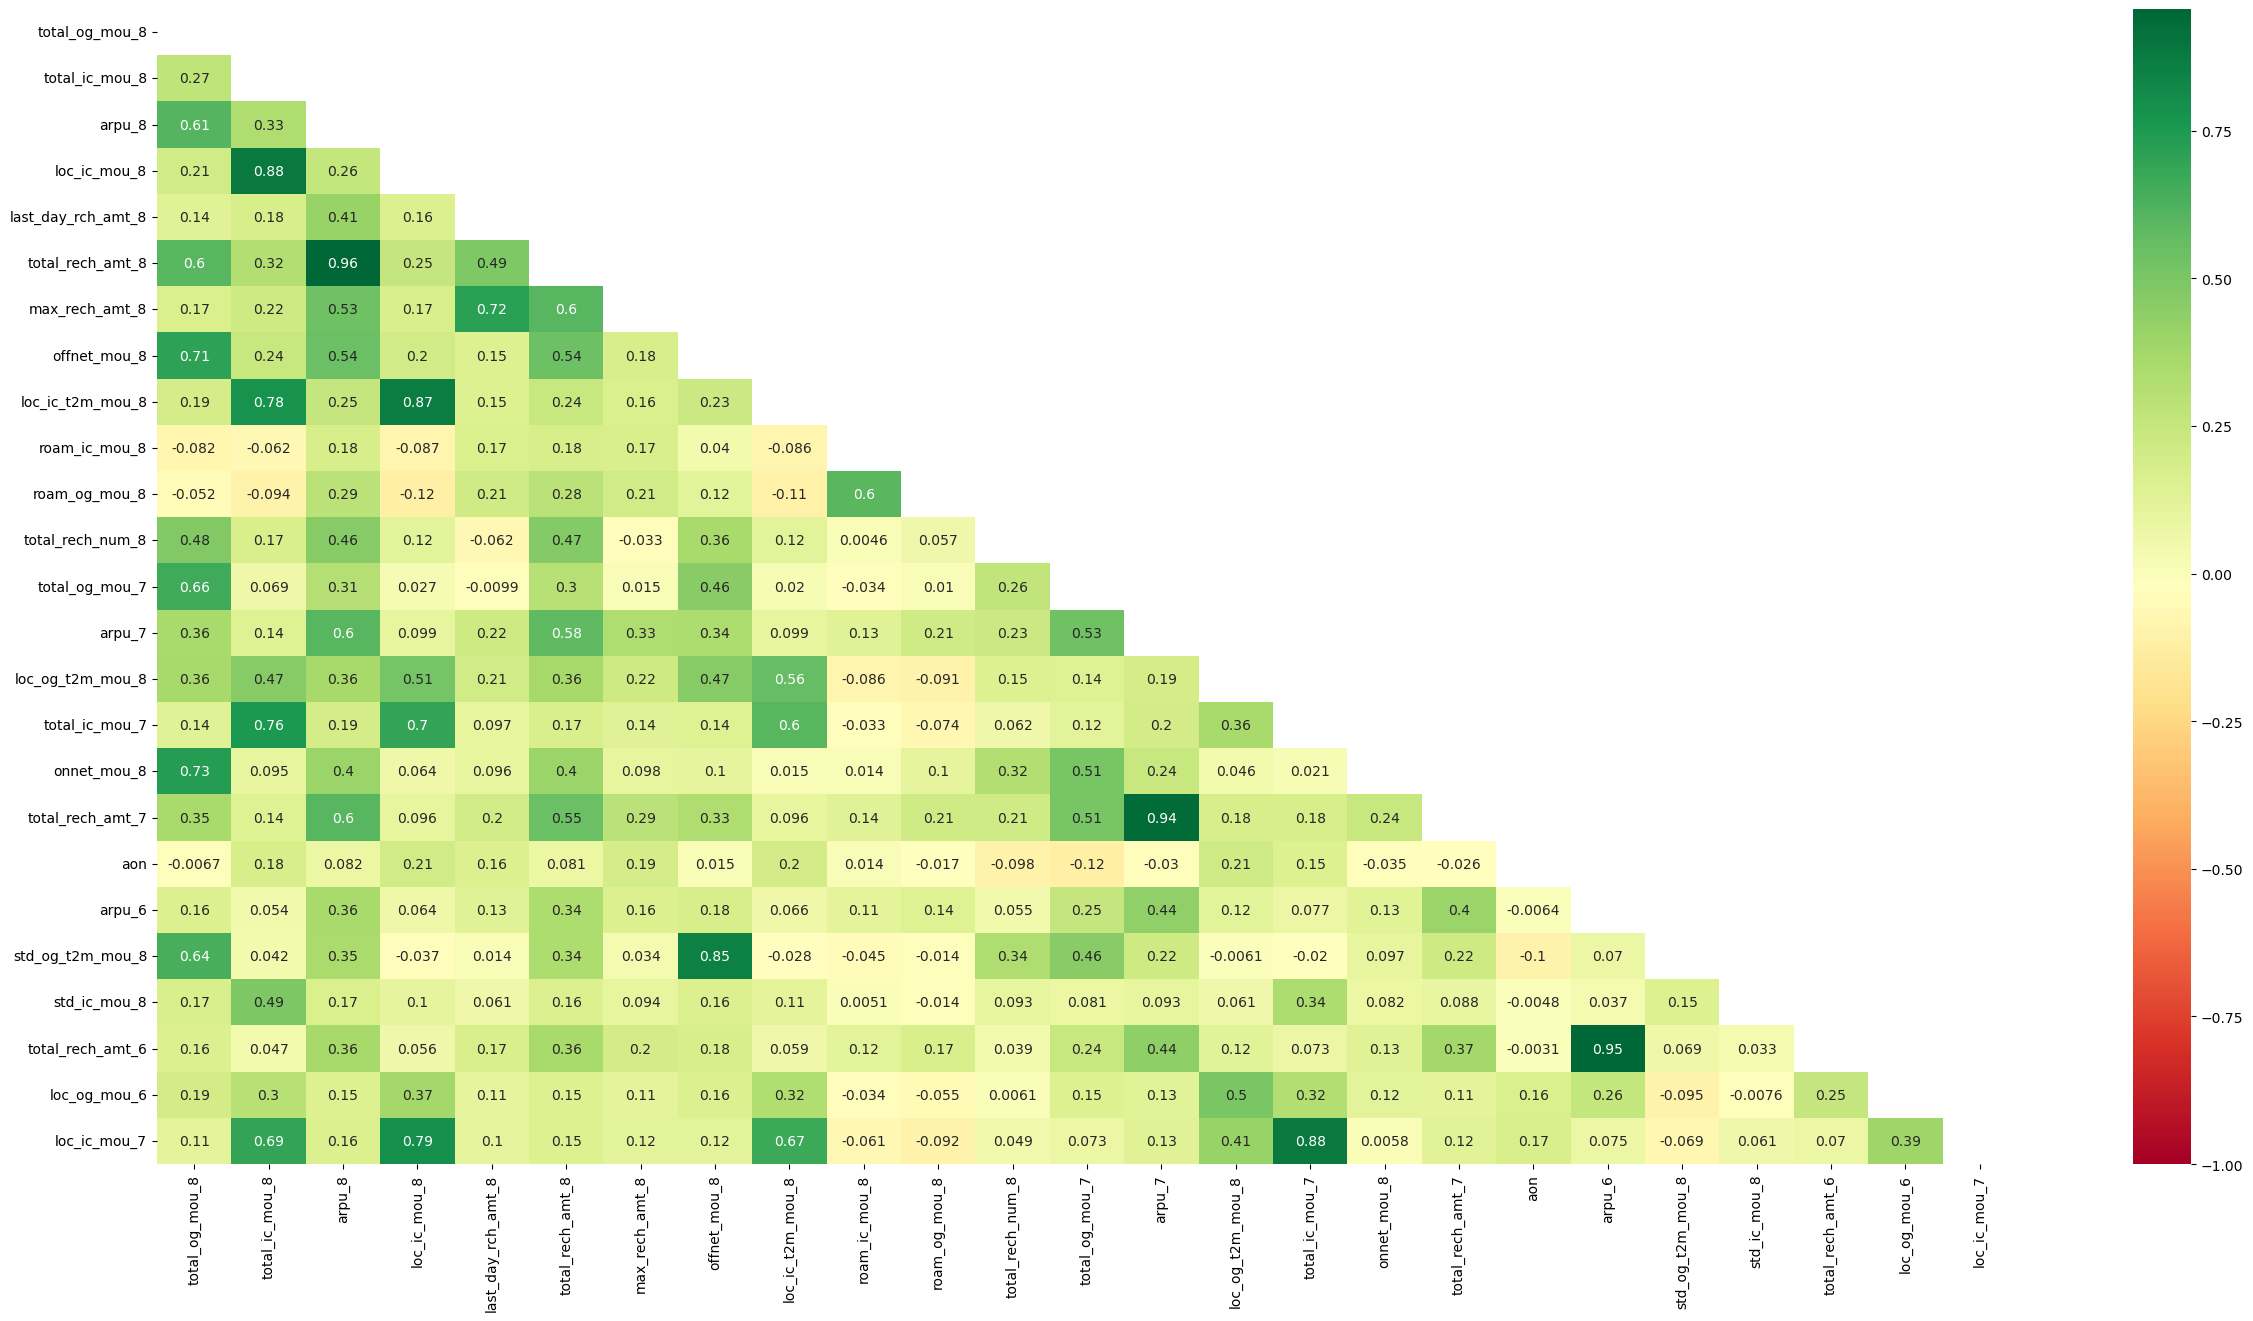

In [1107]:
#Checking the correlation between the features through heatmap

plt.figure(figsize = (30, 15))
df_zero = np.zeros(X_resampled_ada.corr().shape, dtype=bool)
df_zero[np.triu_indices(len(df_zero))] = True
sns.heatmap(X_resampled_ada.corr(), annot = True, cmap='RdYlGn', vmin=-1,mask=df_zero)
plt.show()

### Model Building
Building a logistic regression model with X_resampled_ada and y_resampled_ada

In [1108]:
# Building a simple logistic regression model with statsmodels

logm1 = sm.GLM(y_resampled_ada,(sm.add_constant(X_resampled_ada)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37861
Model:                            GLM   Df Residuals:                    37835
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17791.
Date:                Tue, 07 Nov 2023   Deviance:                       35582.
Time:                        01:10:55   Pearson chi2:                 9.40e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3600
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.9496      0.362     -8.157      0.000      -3.658      -2.241
total_og_mou_8      -140.7790      4.665    -30.176      0.000    -149.923    -131.635
total_ic_mou_8        -6.7961      1.879     -3.617      0.000     -10.479      -3.113
arpu_8                19.9316      2.513      7.931      0.000      15.006      24.857
loc_ic_mou_8         -18.5128      2.307     -8.025      0.000     -23.034     -13.992
last_day_rch_amt_8   -19.5606      0.778    -25.157      0.000     -21.085     -18.037
total_rech_amt_8     -26.9563      2.369    -11.379      0.000     -31.599     -22.313
max_rech_amt_8         3.5618      0.639      5.573      0.000       2.309       4.815
offnet_mou_8         116.5349      5.621     20.732      0.000     105.518     127.552
loc_ic_t2m_mou_8      -6.1862      1.707     -3.624      0.000      -9.532      -2.840
roam_ic_mou_8          5.6218      0.803      7.004      0.000       4.049       7.195
roam_og_mou_8        -30.5173      2.036    -14.992      0.000     -34.507     -26.528
total_rech_num_8      -5.5907      0.333    -16.803      0.000      -6.243      -4.939
total_og_mou_7         5.9509      0.347     17.129      0.000       5.270       6.632
arpu_7                26.9481      2.301     11.714      0.000      22.439      31.457
loc_og_t2m_mou_8      -1.1263      1.946     -0.579      0.563      -4.940       2.687
total_ic_mou_7         4.4468      1.220      3.646      0.000       2.056       6.837
onnet_mou_8           99.8586      3.537     28.233      0.000      92.926     106.791
total_rech_amt_7     -15.1478      1.925     -7.869      0.000     -18.921     -11.375
aon                   -1.2187      0.066    -18.350      0.000      -1.349      -1.089
arpu_6                 9.5407      2.152      4.434      0.000       5.323      13.758
std_og_t2m_mou_8      14.6558      5.078      2.886      0.004       4.703      24.609
std_ic_mou_8         -10.5803      2.108     -5.019      0.000     -14.712      -6.449
total_rech_amt_6      -4.3769      1.904     -2.299      0.021      -8.108      -0.646
loc_og_mou_6          -7.1369      0.646    -11.047      0.000      -8.403      -5.871
loc_ic_mou_7          11.5732      1.386      8.351      0.000       8.857      14.289
======================================================================================
"""

#### Feature Selection with RFE
To further reduce the number of variables, we are opting for recursive feature elimination (RFE)

In [1109]:
#importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#Building logistic model for RFE

logreg = LogisticRegression()

rfe = RFE(estimator = logreg,n_features_to_select=15)                              # Getting top 15 variables for model
rfe = rfe.fit(X_resampled_ada, y_resampled_ada)

In [1110]:
#Checking the features ranked 1 by RFE

list(zip(X_resampled_ada.columns, rfe.support_, rfe.ranking_))

[('total_og_mou_8', True, 1),
 ('total_ic_mou_8', True, 1),
 ('arpu_8', False, 3),
 ('loc_ic_mou_8', False, 4),
 ('last_day_rch_amt_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_8', False, 9),
 ('offnet_mou_8', False, 6),
 ('loc_ic_t2m_mou_8', True, 1),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_og_mou_7', True, 1),
 ('arpu_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('total_ic_mou_7', True, 1),
 ('onnet_mou_8', False, 7),
 ('total_rech_amt_7', False, 5),
 ('aon', False, 8),
 ('arpu_6', True, 1),
 ('std_og_t2m_mou_8', False, 10),
 ('std_ic_mou_8', False, 11),
 ('total_rech_amt_6', True, 1),
 ('loc_og_mou_6', True, 1),
 ('loc_ic_mou_7', False, 2)]

In [1111]:
# Extracting the top 15 columns based on RFE ranking

col = X_resampled_ada.columns[rfe.support_]
col

Index(['total_og_mou_8', 'total_ic_mou_8', 'last_day_rch_amt_8',
       'total_rech_amt_8', 'loc_ic_t2m_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'total_rech_num_8', 'total_og_mou_7', 'arpu_7',
       'loc_og_t2m_mou_8', 'total_ic_mou_7', 'arpu_6', 'total_rech_amt_6',
       'loc_og_mou_6'],
      dtype='object')

#### Assessing the model with StatsModels - logm2

In [1112]:
#Building a logistic model with extracted columns from RFE

X_train_sm = sm.add_constant(X_resampled_ada[col])
logm2 = sm.GLM(y_resampled_ada,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37861
Model:                            GLM   Df Residuals:                    37845
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18663.
Date:                Tue, 07 Nov 2023   Deviance:                       37327.
Time:                        01:10:59   Pearson chi2:                 7.65e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3298
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8668      0.233     -3.717      0.000      -1.324      -0.410
total_og_mou_8        -9.7233      0.718    -13.537      0.000     -11.131      -8.316
total_ic_mou_8       -31.6926      1.036    -30.605      0.000     -33.722     -29.663
last_day_rch_amt_8   -18.8751      0.724    -26.080      0.000     -20.294     -17.457
total_rech_amt_8     -10.4967      1.202     -8.731      0.000     -12.853      -8.140
loc_ic_t2m_mou_8       4.9277      1.369      3.600      0.000       2.245       7.610
roam_ic_mou_8          4.5644      0.713      6.405      0.000       3.168       5.961
roam_og_mou_8         14.0583      0.894     15.729      0.000      12.307      15.810
total_rech_num_8      -6.6886      0.310    -21.553      0.000      -7.297      -6.080
total_og_mou_7         5.1819      0.335     15.477      0.000       4.526       5.838
arpu_7                13.1635      1.067     12.333      0.000      11.072      15.255
loc_og_t2m_mou_8      -6.6853      0.718     -9.315      0.000      -8.092      -5.279
total_ic_mou_7        13.7838      0.706     19.514      0.000      12.399      15.168
arpu_6                 7.1126      1.904      3.735      0.000       3.380      10.845
total_rech_amt_6       1.6627      1.672      0.994      0.320      -1.615       4.940
loc_og_mou_6          -6.4357      0.586    -10.981      0.000      -7.584      -5.287
======================================================================================
"""

In [1113]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]                      #Viewing the output

0    0.077340
1    0.493724
2    0.393753
3    0.480075
4    0.722157
5    0.122168
6    0.117173
7    0.212933
8    0.771271
9    0.233999
dtype: float64

In [1114]:
#Reshaping the y_train_pred

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0773401 , 0.49372423, 0.39375324, 0.48007466, 0.72215676,
       0.12216782, 0.11717311, 0.21293325, 0.77127091, 0.23399898])

#### Creating a dataframe with actual churn flag and predicted probabilities

In [1115]:
#dataframe with actual churn flag and predicted probability

y_train_pred_final = pd.DataFrame({'Churn':y_resampled_ada.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.077340
1,0,0.493724
2,0,0.393753
3,0,0.480075
4,0,0.722157


In [1116]:
#Creating the predicted column based on probability value

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Checking the head of dataframe
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.077340,0
1,0,0.493724,0
2,0,0.393753,0
3,0,0.480075,0
4,0,0.722157,1


In [1117]:
#Checking the confusion matrix 

from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[15158  4034]
 [ 3672 14997]]


In [1118]:
# Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7964660204432001


### Variance Inflation Factor (VIF)

In [1119]:
#Checking the VIF values for the features in model

from statsmodels.stats.outliers_influence import variance_inflation_factor   #importing the necessary library

#Creating a dataframe containing the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_resampled_ada[col].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_ada[col].values, i) for i in range(X_resampled_ada[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,arpu_7,29.78
12,arpu_6,29.46
3,total_rech_amt_8,8.13
13,total_rech_amt_6,6.19
1,total_ic_mou_8,6.14
0,total_og_mou_8,5.89
8,total_og_mou_7,5.67
11,total_ic_mou_7,4.28
4,loc_ic_t2m_mou_8,4.13
7,total_rech_num_8,3.32


##### Few variables have VIF values higher than the threshold limit of 5. Dropping the variable arpu_7 which has highest VIF of 29.78 and building the model again 

In [1120]:
#Dropping the column arpu_7

col = col.drop('arpu_7', 1)
col

Index(['total_og_mou_8', 'total_ic_mou_8', 'last_day_rch_amt_8',
       'total_rech_amt_8', 'loc_ic_t2m_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'total_rech_num_8', 'total_og_mou_7',
       'loc_og_t2m_mou_8', 'total_ic_mou_7', 'arpu_6', 'total_rech_amt_6',
       'loc_og_mou_6'],
      dtype='object')

In [1121]:
#Creating the model using the selected variables

X_train_sm = sm.add_constant(X_resampled_ada[col])
logm3 = sm.GLM(y_resampled_ada,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37861
Model:                            GLM   Df Residuals:                    37846
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18746.
Date:                Tue, 07 Nov 2023   Deviance:                       37492.
Time:                        01:11:01   Pearson chi2:                 8.32e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3269
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1886      0.222     -0.848      0.397      -0.625       0.247
total_og_mou_8       -12.7158      0.680    -18.706      0.000     -14.048     -11.383
total_ic_mou_8       -32.0527      1.029    -31.148      0.000     -34.070     -30.036
last_day_rch_amt_8   -19.3756      0.721    -26.889      0.000     -20.788     -17.963
total_rech_amt_8      -2.9823      0.996     -2.995      0.003      -4.934      -1.031
loc_ic_t2m_mou_8       4.3592      1.356      3.214      0.001       1.701       7.018
roam_ic_mou_8          4.2780      0.696      6.145      0.000       2.914       5.642
roam_og_mou_8         14.2148      0.871     16.312      0.000      12.507      15.923
total_rech_num_8      -6.8895      0.309    -22.290      0.000      -7.495      -6.284
total_og_mou_7         7.2665      0.291     24.989      0.000       6.697       7.836
loc_og_t2m_mou_8      -6.0242      0.707     -8.522      0.000      -7.410      -4.639
total_ic_mou_7        14.7988      0.698     21.190      0.000      13.430      16.168
arpu_6                 7.9612      1.867      4.264      0.000       4.302      11.621
total_rech_amt_6       2.3893      1.636      1.461      0.144      -0.817       5.596
loc_og_mou_6          -6.9955      0.582    -12.019      0.000      -8.136      -5.855
======================================================================================
"""

In [1122]:
#Making the prediction based on the model: logm3

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.07694599, 0.47829815, 0.41255529, 0.49011164, 0.75218406,
       0.12087538, 0.1188212 , 0.21066242, 0.78283078, 0.23511997])

In [1123]:
#Replacing the Churn_prob with new probability values

y_train_pred_final['Churn_Prob'] = y_train_pred

In [1124]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.076946,0
1,0,0.478298,0
2,0,0.412555,0
3,0,0.490112,0
4,0,0.752184,1


In [1125]:
#Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7943794405852989


In [1126]:
#Checking the VIF again

vif = pd.DataFrame()
vif['Features'] = X_resampled_ada[col].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_ada[col].values, i) for i in range(X_resampled_ada[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,arpu_6,7.70
3,total_rech_amt_8,6.42
1,total_ic_mou_8,6.12
12,total_rech_amt_6,5.53
0,total_og_mou_8,5.34
8,total_og_mou_7,4.23
10,total_ic_mou_7,4.20
4,loc_ic_t2m_mou_8,4.13
7,total_rech_num_8,3.31
9,loc_og_t2m_mou_8,2.76


Variable arpu_6 has VIF value of 7.70. Hence, dropping the feature and re-building the model.

In [1127]:
#Dropping arpu_6 since it has a high VIF

col = col.drop('arpu_6')
col

Index(['total_og_mou_8', 'total_ic_mou_8', 'last_day_rch_amt_8',
       'total_rech_amt_8', 'loc_ic_t2m_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'total_rech_num_8', 'total_og_mou_7',
       'loc_og_t2m_mou_8', 'total_ic_mou_7', 'total_rech_amt_6',
       'loc_og_mou_6'],
      dtype='object')

In [1128]:
#creating the model using the selected variables

X_train_sm = sm.add_constant(X_resampled_ada[col])
logm4 = sm.GLM(y_resampled_ada,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37861
Model:                            GLM   Df Residuals:                    37847
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18755.
Date:                Tue, 07 Nov 2023   Deviance:                       37510.
Time:                        01:11:02   Pearson chi2:                 8.45e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3266
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7508      0.030     24.850      0.000       0.692       0.810
total_og_mou_8       -12.8310      0.679    -18.890      0.000     -14.162     -11.500
total_ic_mou_8       -32.0941      1.029    -31.175      0.000     -34.112     -30.076
last_day_rch_amt_8   -19.6242      0.721    -27.215      0.000     -21.037     -18.211
total_rech_amt_8      -2.5257      0.987     -2.559      0.011      -4.460      -0.591
loc_ic_t2m_mou_8       4.4674      1.356      3.294      0.001       1.809       7.126
roam_ic_mou_8          4.4511      0.706      6.301      0.000       3.066       5.836
roam_og_mou_8         13.8686      0.895     15.501      0.000      12.115      15.622
total_rech_num_8      -6.8672      0.309    -22.230      0.000      -7.473      -6.262
total_og_mou_7         7.3044      0.290     25.150      0.000       6.735       7.874
loc_og_t2m_mou_8      -6.1802      0.707     -8.737      0.000      -7.566      -4.794
total_ic_mou_7        14.7728      0.698     21.150      0.000      13.404      16.142
total_rech_amt_6       8.8700      0.634     13.981      0.000       7.627      10.114
loc_og_mou_6          -6.7704      0.577    -11.727      0.000      -7.902      -5.639
======================================================================================
"""

##### From the above summary, we could see that P value of the variables are less than 5% which states that the obtained co-efficients of features are statistically significant.

In [1129]:
# Making the predictions based on the logm4

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.07691327, 0.47021156, 0.41394641, 0.50175091, 0.74803102,
       0.12451325, 0.11670326, 0.20776818, 0.78558827, 0.23759184])

In [1130]:
#Replacing the churn_prob based on the new probability values

y_train_pred_final['Churn_Prob'] = y_train_pred

In [1131]:
#Creating a column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.076913,0
1,0,0.470212,0
2,0,0.413946,0
3,0,0.501751,1
4,0,0.748031,1


In [1132]:
#Checking the overall accuracy of model

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7933493568579805


In [1133]:
#Checking the VIF again

vif = pd.DataFrame()
vif['Features'] = X_resampled_ada[col].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_ada[col].values, i) for i in range(X_resampled_ada[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_rech_amt_8,6.37
1,total_ic_mou_8,6.11
0,total_og_mou_8,5.29
4,loc_ic_t2m_mou_8,4.11
10,total_ic_mou_7,4.11
8,total_og_mou_7,4.00
11,total_rech_amt_6,2.99
9,loc_og_t2m_mou_8,2.76
7,total_rech_num_8,2.73
12,loc_og_mou_6,2.21


Variable total_rech_amt_8 has marginally high VIF of 6.37. Hence, dropping the column and re-building the model again.

In [1134]:
#Dropping total_rech_amt_8 since it has a high VIF

col = col.drop('total_rech_amt_8')
col

Index(['total_og_mou_8', 'total_ic_mou_8', 'last_day_rch_amt_8',
       'loc_ic_t2m_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'total_rech_num_8', 'total_og_mou_7', 'loc_og_t2m_mou_8',
       'total_ic_mou_7', 'total_rech_amt_6', 'loc_og_mou_6'],
      dtype='object')

In [1135]:
#creating the model using the selected variables - logm5

X_train_sm = sm.add_constant(X_resampled_ada[col])
logm5 = sm.GLM(y_resampled_ada,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37861
Model:                            GLM   Df Residuals:                    37848
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18758.
Date:                Tue, 07 Nov 2023   Deviance:                       37516.
Time:                        01:11:04   Pearson chi2:                 8.71e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3265
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7600      0.030     25.253      0.000       0.701       0.819
total_og_mou_8       -13.4841      0.629    -21.425      0.000     -14.718     -12.251
total_ic_mou_8       -32.4737      1.022    -31.759      0.000     -34.478     -30.470
last_day_rch_amt_8   -20.3388      0.662    -30.726      0.000     -21.636     -19.041
loc_ic_t2m_mou_8       4.7299      1.357      3.486      0.000       2.071       7.389
roam_ic_mou_8          4.3298      0.690      6.275      0.000       2.977       5.682
roam_og_mou_8         13.4291      0.848     15.837      0.000      11.767      15.091
total_rech_num_8      -7.1654      0.287    -24.926      0.000      -7.729      -6.602
total_og_mou_7         7.4024      0.288     25.690      0.000       6.838       7.967
loc_og_t2m_mou_8      -6.4330      0.703     -9.149      0.000      -7.811      -5.055
total_ic_mou_7        14.8239      0.700     21.188      0.000      13.453      16.195
total_rech_amt_6       8.3139      0.599     13.882      0.000       7.140       9.488
loc_og_mou_6          -6.5934      0.573    -11.505      0.000      -7.717      -5.470
======================================================================================
"""

In [1136]:
# Making the predictions based on the logm5

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.07417738, 0.46350826, 0.41408047, 0.49228612, 0.74452041,
       0.12555234, 0.11256377, 0.20553873, 0.78446376, 0.24806425])

In [1137]:
#Replacing the churn_prob based on the new probability values

y_train_pred_final['Churn_Prob'] = y_train_pred

In [1138]:
#Creating a column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.074177,0
1,0,0.463508,0
2,0,0.414080,0
3,0,0.492286,0
4,0,0.744520,1


In [1139]:
#Checking the overall accuracy of model

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7937719553102137


In [1140]:
#Checking the VIF again

vif = pd.DataFrame()
vif['Features'] = X_resampled_ada[col].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_ada[col].values, i) for i in range(X_resampled_ada[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,total_ic_mou_8,6.05
0,total_og_mou_8,4.25
3,loc_ic_t2m_mou_8,4.11
9,total_ic_mou_7,4.10
7,total_og_mou_7,3.88
8,loc_og_t2m_mou_8,2.71
10,total_rech_amt_6,2.66
6,total_rech_num_8,2.35
11,loc_og_mou_6,2.18
5,roam_og_mou_8,1.77


As per the above VIF values, we could see variable total_ic_mou_8 has marginally high VIF of 6.05. Hence, dropping the feature total_ic_mou_8 and building a new model

In [1141]:
#Dropping total_ic_mou_8 since it has a high VIF

col = col.drop('total_ic_mou_8')
col

Index(['total_og_mou_8', 'last_day_rch_amt_8', 'loc_ic_t2m_mou_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'total_rech_num_8', 'total_og_mou_7',
       'loc_og_t2m_mou_8', 'total_ic_mou_7', 'total_rech_amt_6',
       'loc_og_mou_6'],
      dtype='object')

In [1142]:
#creating the model using the selected variables - logm6

X_train_sm = sm.add_constant(X_resampled_ada[col])
logm6 = sm.GLM(y_resampled_ada,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37861
Model:                            GLM   Df Residuals:                    37849
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19473.
Date:                Tue, 07 Nov 2023   Deviance:                       38945.
Time:                        01:11:05   Pearson chi2:                 1.25e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3005
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8175      0.030     27.458      0.000       0.759       0.876
total_og_mou_8       -20.2991      0.627    -32.381      0.000     -21.528     -19.070
last_day_rch_amt_8   -23.2982      0.663    -35.158      0.000     -24.597     -21.999
loc_ic_t2m_mou_8     -20.3463      1.058    -19.222      0.000     -22.421     -18.272
roam_ic_mou_8          3.9920      0.660      6.051      0.000       2.699       5.285
roam_og_mou_8         14.4351      0.814     17.736      0.000      12.840      16.030
total_rech_num_8      -8.1765      0.290    -28.208      0.000      -8.745      -7.608
total_og_mou_7         9.6309      0.285     33.775      0.000       9.072      10.190
loc_og_t2m_mou_8      -6.4380      0.730     -8.823      0.000      -7.868      -5.008
total_ic_mou_7        -0.2871      0.377     -0.762      0.446      -1.026       0.452
total_rech_amt_6       9.4202      0.591     15.945      0.000       8.262      10.578
loc_og_mou_6          -5.7304      0.529    -10.830      0.000      -6.768      -4.693
======================================================================================
"""

From the above summary, we could see that variable total_ic_mou_7 has P-value higher than 5%

In [1143]:
# Making the predictions based on the logm6

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.1112975 , 0.52775481, 0.39982329, 0.60055878, 0.75943881,
       0.08334562, 0.12897315, 0.0904734 , 0.81370821, 0.17595791])

In [1144]:
#Replacing the churn_prob based on the new probability values

y_train_pred_final['Churn_Prob'] = y_train_pred

In [1145]:
#Creating a column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.111297,0
1,0,0.527755,1
2,0,0.399823,0
3,0,0.600559,1
4,0,0.759439,1


In [1146]:
#Checking the overall accuracy of model

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7843163149414966


In [1147]:
#Checking the VIF again

vif = pd.DataFrame()
vif['Features'] = X_resampled_ada[col].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_ada[col].values, i) for i in range(X_resampled_ada[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,total_og_mou_8,4.01
6,total_og_mou_7,3.75
2,loc_ic_t2m_mou_8,2.85
7,loc_og_t2m_mou_8,2.70
9,total_rech_amt_6,2.65
8,total_ic_mou_7,2.60
5,total_rech_num_8,2.35
10,loc_og_mou_6,2.18
4,roam_og_mou_8,1.77
3,roam_ic_mou_8,1.66


Dropping the column: total_ic_mou_7 which has high P-value and rebuilding the logictic model

In [1148]:
#Dropping total_ic_mou_7 since it has a high VIF

col = col.drop('total_ic_mou_7')
col

Index(['total_og_mou_8', 'last_day_rch_amt_8', 'loc_ic_t2m_mou_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'total_rech_num_8', 'total_og_mou_7',
       'loc_og_t2m_mou_8', 'total_rech_amt_6', 'loc_og_mou_6'],
      dtype='object')

In [1149]:
#creating the model using the selected variables - logm7

X_train_sm = sm.add_constant(X_resampled_ada[col])
logm7 = sm.GLM(y_resampled_ada,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37861
Model:                            GLM   Df Residuals:                    37850
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19473.
Date:                Tue, 07 Nov 2023   Deviance:                       38946.
Time:                        01:11:06   Pearson chi2:                 1.24e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3005
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8150      0.030     27.542      0.000       0.757       0.873
total_og_mou_8       -20.2436      0.622    -32.528      0.000     -21.463     -19.024
last_day_rch_amt_8   -23.3140      0.663    -35.189      0.000     -24.613     -22.015
loc_ic_t2m_mou_8     -20.6937      0.956    -21.638      0.000     -22.568     -18.819
roam_ic_mou_8          3.9763      0.660      6.025      0.000       2.683       5.270
roam_og_mou_8         14.4530      0.814     17.759      0.000      12.858      16.048
total_rech_num_8      -8.1783      0.290    -28.215      0.000      -8.746      -7.610
total_og_mou_7         9.5938      0.281     34.173      0.000       9.044      10.144
loc_og_t2m_mou_8      -6.4048      0.728     -8.793      0.000      -7.832      -4.977
total_rech_amt_6       9.4295      0.591     15.964      0.000       8.272      10.587
loc_og_mou_6          -5.7831      0.525    -11.019      0.000      -6.812      -4.754
======================================================================================
"""

In [1150]:
# Making the predictions based on the logm7

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.11113493, 0.52772795, 0.39970579, 0.60200823, 0.75945808,
       0.08309218, 0.12895124, 0.09074288, 0.81281869, 0.1756978 ])

In [1151]:
#Replacing the churn_prob based on the new probability values

y_train_pred_final['Churn_Prob'] = y_train_pred

In [1152]:
#Creating a column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.111135,0
1,0,0.527728,1
2,0,0.399706,0
3,0,0.602008,1
4,0,0.759458,1


In [1153]:
#Checking the overall accuracy of model

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7843691397480257


In [1154]:
#Checking the VIF again

vif = pd.DataFrame()
vif['Features'] = X_resampled_ada[col].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_ada[col].values, i) for i in range(X_resampled_ada[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,total_og_mou_8,3.96
6,total_og_mou_7,3.60
7,loc_og_t2m_mou_8,2.70
8,total_rech_amt_6,2.64
5,total_rech_num_8,2.33
9,loc_og_mou_6,2.12
2,loc_ic_t2m_mou_8,2.03
4,roam_og_mou_8,1.77
3,roam_ic_mou_8,1.66
1,last_day_rch_amt_8,1.49


#### As per the logistic model logm7, we could see that P-value for the co-efficients of the variables and VIF values of the features are within the threshold limit.

In [1155]:
#Checking the confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[14800,  4392],
       [ 3772, 14897]], dtype=int64)

### Metrics - Sensitivity, Specificity, Predictive Value

In [1156]:
#Getting true positive, true negative, false positive and false negative values from confusion matrix

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1157]:
# Checking the sensitivity and specificity of the model

print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))

Sensitivity:  0.7979538272001714
Specificity:  0.7711546477699042


In [1158]:
#Checking false positive rate, positive predictive value, negative predictive value

print("False Positive Rate: ",FP/ float(TN+FP))
print("Positive Predictive Value: ",TP / float(TP+FP))
print("Negative Predictive Value: ",TN / float(TN+ FN))

False Positive Rate:  0.22884535223009586
Positive Predictive Value:  0.7723054590699362
Negative Predictive Value:  0.7968985569674779


### Plotting ROC Curve

An ROC curve demonstrates:

- The tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1159]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1160]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

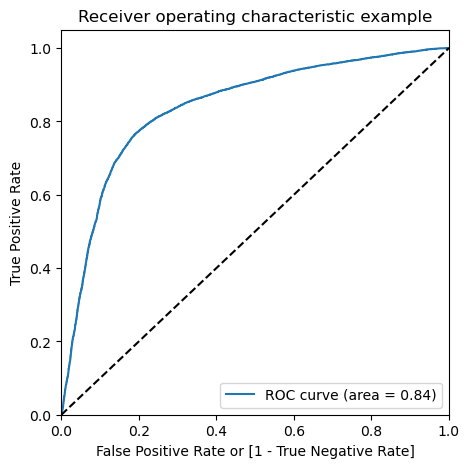

In [1161]:
#Plotting the ROC curve

draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding the Optimal Cutoff

Optimal cutoff probability is the probability value where we get balanced sensitivity and specificity.

In [1162]:
#Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.111135,0,1,1,0,0,0,0,0,0,0,0
1,0,0.527728,1,1,1,1,1,1,1,0,0,0,0
2,0,0.399706,0,1,1,1,1,0,0,0,0,0,0
3,0,0.602008,1,1,1,1,1,1,1,1,0,0,0
4,0,0.759458,1,1,1,1,1,1,1,1,1,0,0


In [1163]:
#Calculating accuracy sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.493093     1.000000     0.000000
0.1          0.1  0.574285     0.976432     0.183097
0.2          0.2  0.641214     0.950988     0.339881
0.3          0.3  0.700642     0.908994     0.497968
0.4          0.4  0.754761     0.861749     0.650688
0.5          0.5  0.784369     0.797954     0.771155
0.6          0.6  0.777291     0.695913     0.856451
0.7          0.7  0.714614     0.506455     0.917101
0.8          0.8  0.625182     0.282179     0.958837
0.9          0.9  0.549114     0.101773     0.984264


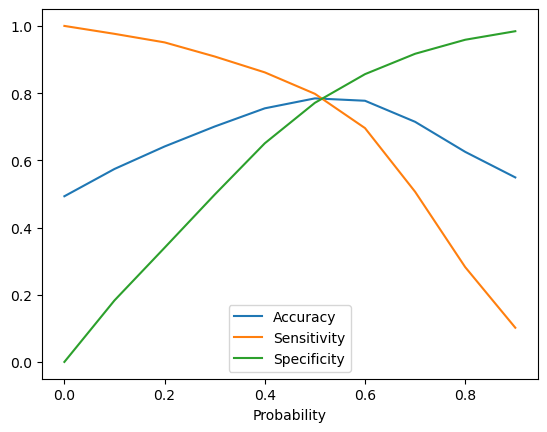

In [1164]:
#Plotting accuracy sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

#### From the above curve, 0.5 is the optimal point to take as cutoff probability.

In [1165]:
# Creating the final_predicted column with 0.5 as cutoff

y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.111135,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.527728,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.399706,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.602008,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.759458,1,1,1,1,1,1,1,1,1,0,0,1


In [1166]:
#Checking the overall accuracy again

metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7843691397480257

In [1167]:
#Checking the confusion matrix based on final_predicted

confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[14800,  4392],
       [ 3772, 14897]], dtype=int64)

In [1168]:
#Getting true positive, true negative, false positive and false negative values from confusion matrix

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1169]:
# Checking the sensitivity and specificity of the model

print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))

Sensitivity:  0.7979538272001714
Specificity:  0.7711546477699042


In [1170]:
#Checking false positive rate, positive predictive value, negative predictive value

print("False Positive Rate: ",FP/ float(TN+FP))
print("Positive Predictive Value: ",TP / float(TP+FP))
print("Negative Predictive Value: ",TN / float(TN+ FN))

False Positive Rate:  0.22884535223009586
Positive Predictive Value:  0.7723054590699362
Negative Predictive Value:  0.7968985569674779


### Metrics - Precision & Recall
Precision measures the percentage of predictions made by the model that are correct. Recall measures the percentage of relevant data points that were correctly identified by the model.

In [1171]:
#Checking the confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[14800,  4392],
       [ 3772, 14897]], dtype=int64)

##### Precision
TP / TP + FP

In [1172]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7723054590699362

##### Recall
TP / TP + FN

In [1173]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7979538272001714

### Precision Recall Tradeoff

In [1174]:
#Importing necessary library

from sklearn.metrics import precision_recall_curve

In [1175]:
y_train_pred_final[['Churn','predicted']].head(15)

,Churn,predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,1
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


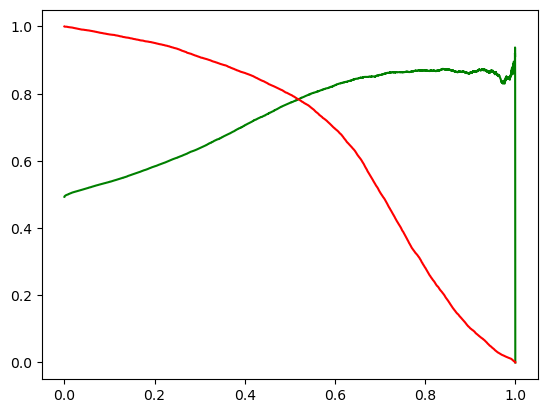

In [1176]:
#Plotting precision recall curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on test dataset

In [1177]:
#Rescaling features of the test dataset

#Assigning scaler as MinMaxScaler

cols_model = ['total_og_mou_8', 'total_ic_mou_8', 'arpu_8', 'loc_ic_mou_8',
       'last_day_rch_amt_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'offnet_mou_8', 'loc_ic_t2m_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'total_rech_num_8', 'total_og_mou_7', 'arpu_7',
       'loc_og_t2m_mou_8', 'total_ic_mou_7', 'onnet_mou_8',
       'total_rech_amt_7', 'aon', 'arpu_6', 'std_og_t2m_mou_8',
       'std_ic_mou_8', 'total_rech_amt_6', 'loc_og_mou_6', 'loc_ic_mou_7']

X_test[cols_model] = scaler.transform(X_test[cols_model])

In [1178]:
#Assigning X_test dataframe with columns of final model

X_test = X_test[col]
X_test.head()

,total_og_mou_8,last_day_rch_amt_8,loc_ic_t2m_mou_8,roam_ic_mou_8,roam_og_mou_8,total_rech_num_8,total_og_mou_7,loc_og_t2m_mou_8,total_rech_amt_6,loc_og_mou_6
mobile_number,,,,,,,,,,
7001792117,0.040075,0.000000,0.016231,0.000000,0.000000,0.050725,0.011238,0.003126,0.027568,0.002242
7002272937,0.033193,0.011238,0.051256,0.000000,0.000000,0.144928,0.039443,0.027666,0.024324,0.031591
7001008835,0.090104,0.004495,0.000960,0.000000,0.000000,0.289855,0.179378,0.000210,0.005730,0.000031
7000603522,0.081993,0.011238,0.037726,0.000000,0.000000,0.137681,0.210531,0.033304,0.053838,0.017857
7002185717,0.018129,0.000000,0.011939,0.011193,0.002359,0.021739,0.039649,0.018495,0.028054,0.018811


Making predictions on test dataset

In [1179]:
#Adding constant to X_test

X_test_sm = sm.add_constant(X_test)

#Making predictions on test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

mobile_number
7001792117    0.398392
7002272937    0.107458
7001008835    0.150490
7000603522    0.309465
7002185717    0.627023
7002077049    0.193408
7002027328    0.188564
7000926285    0.539223
7002296021    0.300215
7000406308    0.269523
dtype: float64

In [1180]:
# Converting y_test_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
mobile_number,
7001792117,0.398392
7002272937,0.107458
7001008835,0.150490
7000603522,0.309465
7002185717,0.627023


In [1181]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [1182]:
#Putting mobile_number to index

y_test_df['mobile_number'] = y_test_df.index

In [1183]:
# Removing index for both dataframes to append the dataframes

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1184]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,churn,mobile_number,0
0,0,7001792117,0.398392
1,0,7002272937,0.107458
2,0,7001008835,0.150490
3,0,7000603522,0.309465
4,0,7002185717,0.627023


In [1185]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [1186]:
#Rearranging the columns

y_pred_final = y_pred_final[['mobile_number','churn','Churn_Prob']]
y_pred_final.head()

,mobile_number,churn,Churn_Prob
0,7001792117,0,0.398392
1,7002272937,0,0.107458
2,7001008835,0,0.150490
3,7000603522,0,0.309465
4,7002185717,0,0.627023


In [1187]:
#Predictions based on the cutoff value 0.5

y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final.head()

,mobile_number,churn,Churn_Prob,final_predicted
0,7001792117,0,0.398392,0
1,7002272937,0,0.107458,0
2,7001008835,0,0.150490,0
3,7000603522,0,0.309465,0
4,7002185717,0,0.627023,1


In [1188]:
#Checking the overall accuracy

metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.7732119058196357

In [1189]:
#Checking the confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6315, 1911],
       [ 131,  647]], dtype=int64)

In [1190]:
#Getting true positive, true negative, false positive and false negative values from confusion matrix

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1191]:
# Checking the sensitivity and specificity of the model

print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))

Sensitivity:  0.8316195372750642
Specificity:  0.7676878191101386


In [1192]:
#Recall value for the test set

print("Recall: ",recall_score(y_pred_final.churn, y_pred_final.final_predicted))

Recall:  0.8316195372750642


### Inferences

While we have checked both Sensitivity and Specificity as well as Precision and Recall metrics, we have considered the optimal cut-off which is 0.5 based on the Accuracy, Sensitivity and Specificity tradeoff for calculating the final predictions

Accuracy, Sensitivity and Specificity values of the Test dataset are around 77.3%, 83% and 76% which are approximately closer to the respective values calculated using training dataset

Top features which are responsible for the churn or not churn decision of the customers are:

- total_og_mou_8
- total_og_mou_7
- loc_og_t2m_mou_8
- total_rech_amt_6
- total_rech_num_8
- loc_og_mou_6
- loc_ic_t2m_mou_8
- roam_og_mou_8
- roam_ic_mou_8
- last_day_rch_amt_8

### Recommendations

- As per the final logistic model, we could see that features total_og_mou_8, last_day_rch_amt_8 & loc_ic_t2m_mou_8 plays crucial role in deciding the churn of the customers. Hence, it is recommended to reach out to the customers who haven't made any outgoing calls, minimal recharge amount and customers who have dropped minutes of incoming calls during the action phase.
- Co-efficients of the above variables strongly indicates that these features has significant effect on churn of customers. Hence, drop in the either of the above variable's numbers should be given an importance.
- total_rech_num_8 and loc_og_mou_6 are other crucial indicators of the churn.
- Business Recommendations
   - Offering competitive pricing and plans
   - Personalizing the customer experience
   - Improving network quality and reliability
   - Implementing loyalty programs to reward long-term customers with special incentives, discounts, or exclusive services.
   - Investing in self-service options
   - Offering long-term contracts with discounts and benefits to encourage commitment from customers.